# 데이터 구성

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터 로드

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 데이터 타입, 결측치, 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치 여부 확인하기
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 수치 데이터 요약
# include = "object" -> 범주형 데이터 요약값
df.describe()

# 평균이 중위값보다 높은 컬럼이 몇몇 있다
# 최솟값이 0인 것들은.. 좀 이상한데 결측값이 아닐까? 라고 생각해보기

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 가장 마지막에 Outcome은 label 값이기 때문에 제외하고, 학습과 예측에 사용할 컬럼 만들어서 리스트로 만들어주기
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화

In [8]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
# 결측치 여부를 나타내는 데이터 프레임 만들기
# 0값을 결측치라 가정하고, 정답(label, target)값을 제외한 컬럼에 대해 결측치 여부 구하기
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum() # 결측치가 꽤 많이 보인다

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [10]:
# bool 형태여서 평균을 구해볼 경우, 비율로 나온다
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

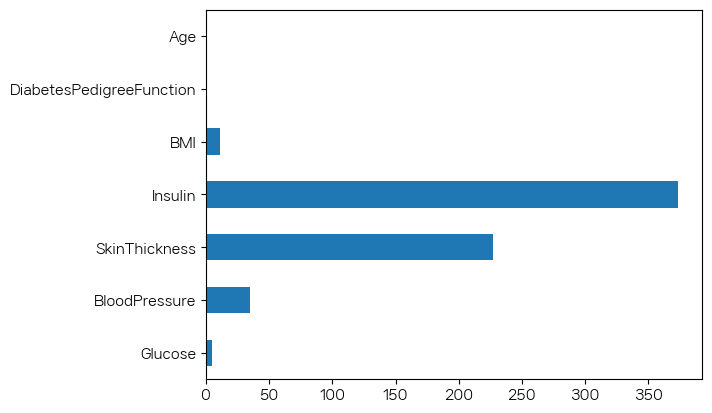

In [11]:
# 결측치의 개수를 구해, 막대 그래프로 시각화
df_null.sum().plot.barh();

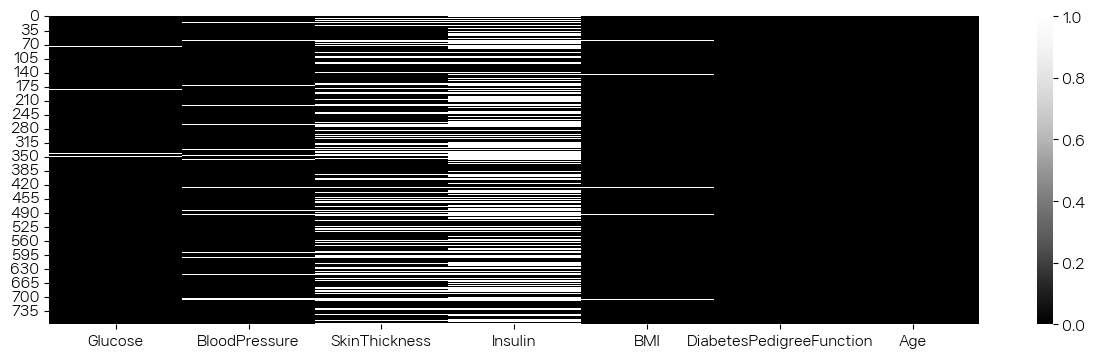

In [12]:
# 결측치를 히트맵으로 시각화
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r");

# 정답값
- target 또는 label 이라고 부른다

In [13]:
# 정답값인 Outcome의 개수 확인
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
# 1 또는 normalize=True: Outcome의 비율 확인하기
df["Outcome"].value_counts(1)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [15]:
# 임신 횟수와 정답값 비교
# 임신 횟수에 따른 Outcome의 비율 구하기
# df.groupby(["Pregnancies"])["Outcome"].mean() -> 비율 구하기 
# df.groupby(["Pregnancies"]).agg({"Outcome":["mean", "count"]}) -> 이거와 아래의 차이점?

# (인덱스에 올 값 / value에 올 값 / agg 연산할 내용)
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index() # 왼쪽 인덱스를 컬럼으로 사용하려고 reset_index()
df_po
# 임신 횟수가 늘어날수록 당뇨병 발생 비율이 높아지는 것을 볼 수 있다
# 임신 횟수가 14번 이상이면 발병률이 100%인데 데이터 수가 적어서 이런 결과가 나왔다고 의심해볼 수 있다.
# 확실히 임신 횟수가 많을수록 데이터가 적다

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


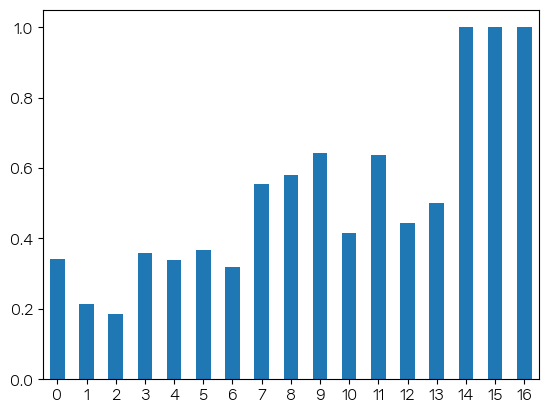

In [16]:
# 임신 횟수에 따른 당뇨병 발병 비율
df_po["mean"].plot.bar(rot=0);

# countplot

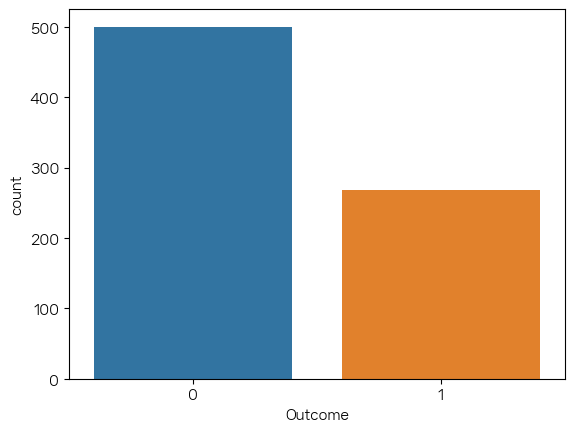

In [17]:
# 당뇨병 발병 빈도수
sns.countplot(data=df, x="Outcome");

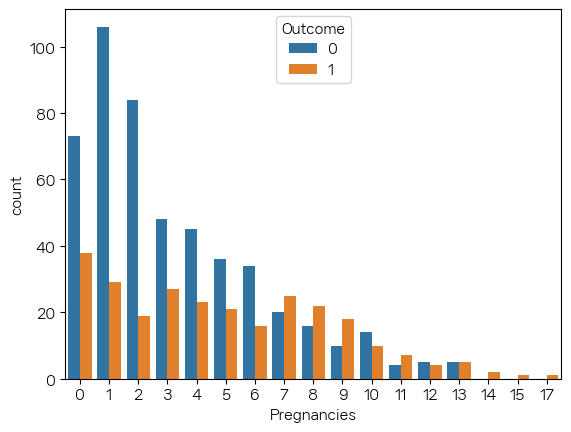

In [18]:
# 임신 횟수에 따른 당뇨병 발병 빈도수
# hue: 값에 따라 색상 구분
# 7번 이상부터는 당뇨병 발병수가 높아지는 걸 볼 수 있다.

sns.countplot(data=df, x="Pregnancies", hue="Outcome");

In [19]:
# 임신 횟수의 많고 적음에 따라 Pregnancies_high 변수를 만든다
df["Pregnancies_high"] = df["Pregnancies"] > 6 
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


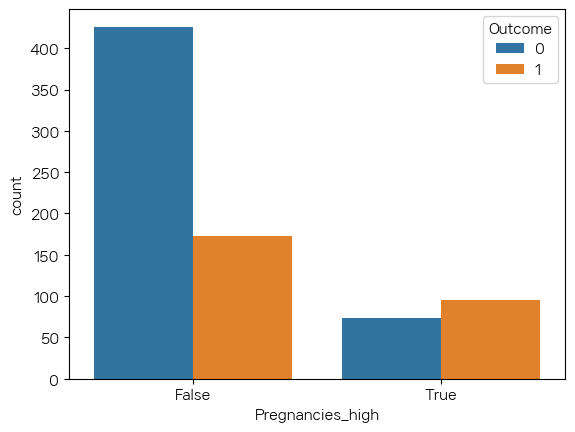

In [20]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고, Outcome 값에 따라 다른 색상으로 표현
# 임신 횟수가 적은 그룹에서 발병 횟수가 더 낮고, 임신 횟수가 높은 그룹에서 발병한 횟수가 더 높다
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome");

# barplot

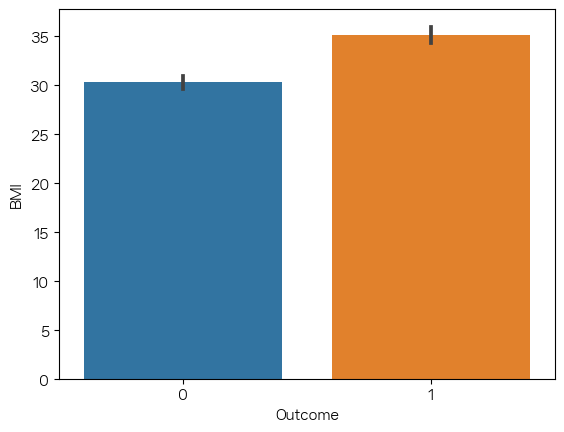

In [21]:
# 당뇨병 발병에 따른 BMI 수치 비교
sns.barplot(data=df, x="Outcome", y="BMI");

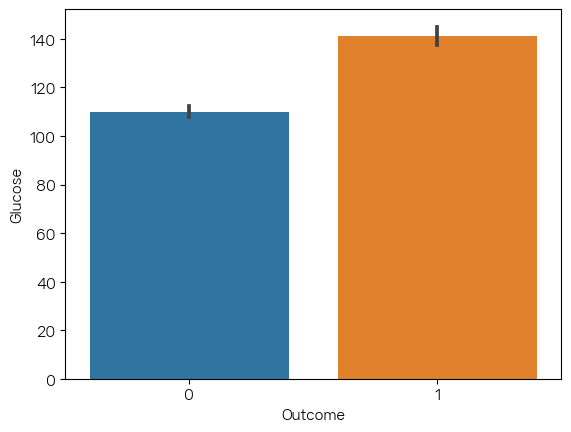

In [22]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치
sns.barplot(data=df, x="Outcome", y="Glucose");

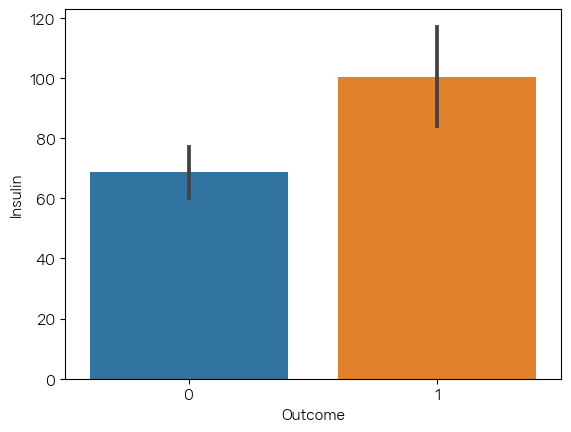

In [23]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병 비교
# y축은 평균값 표시
# 검은 막대(bootstrap): 데이터 일부를 샘플링하여 95%(ci) 신뢰구간을 나타내는데 두 그래프의 신뢰구간 차이가 크다고 볼 수 있다.
sns.barplot(data=df, x="Outcome", y="Insulin");

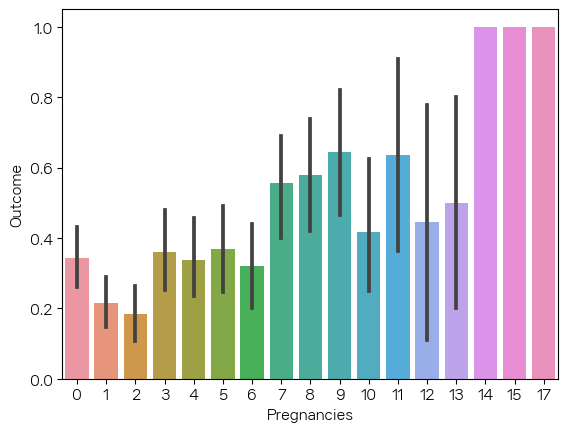

In [24]:
# 임신 횟수에 대해서 당뇨병 발병 비율
# y축: 평균값, Outcome의 비율 확인 가능하다.
sns.barplot(data=df, x="Pregnancies", y="Outcome");

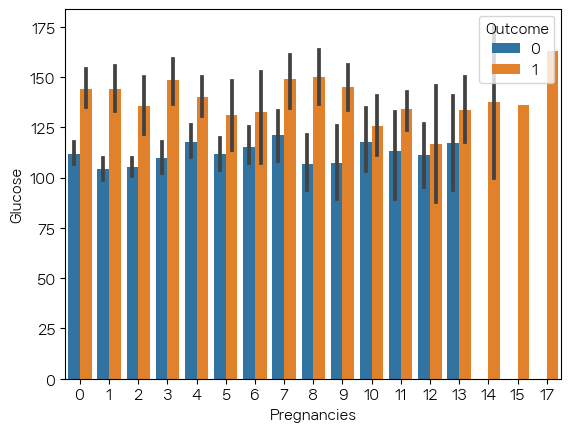

In [25]:
# 임신 횟수에 따른 글루코스 수치를 당뇨병 발병 여부에 따라 시각화 -> 발병 여부에 따라 글루코스 차이가 있음
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome");

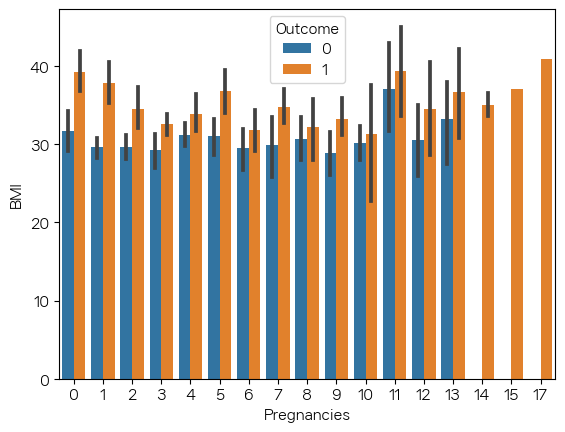

In [26]:
# 임신 횟수에 따른 체질량 지수를 당뇨병 발병 여부에 따라 시각화
# 당뇨병이 발병한 사람들의 BMI 수치가 더 높다
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome");

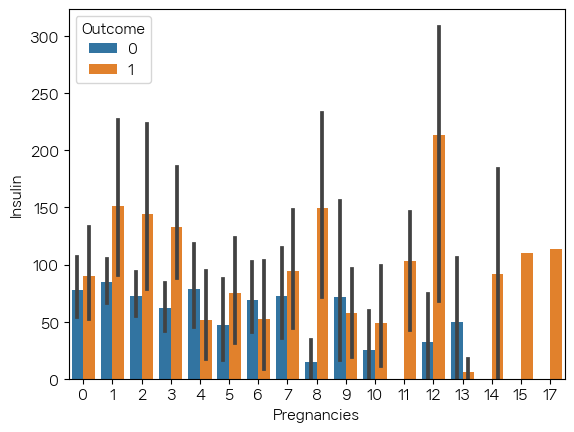

In [27]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다
# y축은 평균값
# 당뇨병이 발병한 사람들이 인슐린 수치가 더 높게 나왔다.
# 신뢰구간의 차이가 꽤 나는 것을 볼 수 있음
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome");

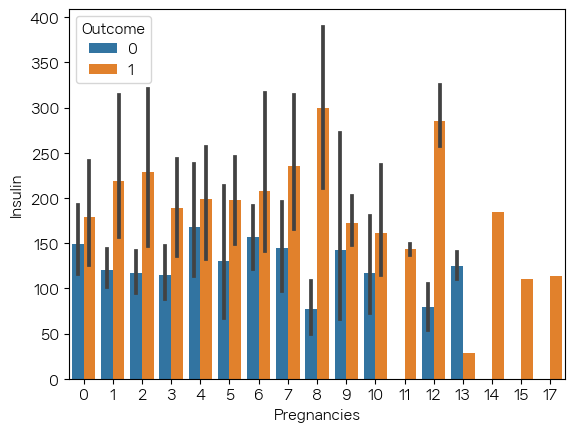

In [28]:
# 신뢰구간의 크기가 줄어 듦
# 발병하는 사람들의 인슐린 신뢰구간의 차이가 많이 난다는 것을 알 수 있고, 발병하지 않는 경우는 인슐린 수치가 낮음을 알 수 있다.
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome");

# boxplot

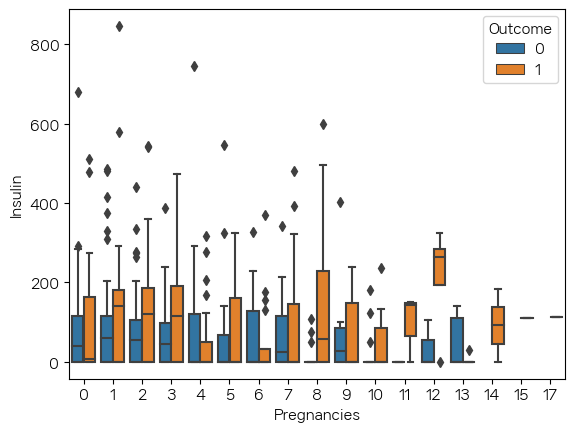

In [29]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# 1사분위수와 3사분위수의 차이가 크고, 최대값과 최소값의 차이도 크다
# Insulin 값으로 0이 많으므로 boxplot이 주저 앉아 있는 데이터를 볼 수 있다.
sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome");

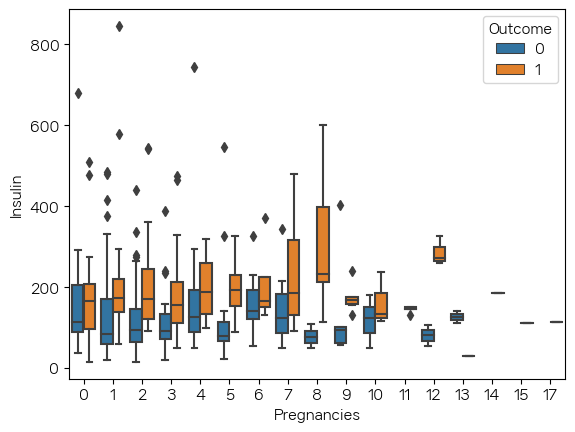

In [30]:
# 따라서, 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다
# 임신 횟수가 늘어날수록 수치가 늘어남

sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome");

# violinplot

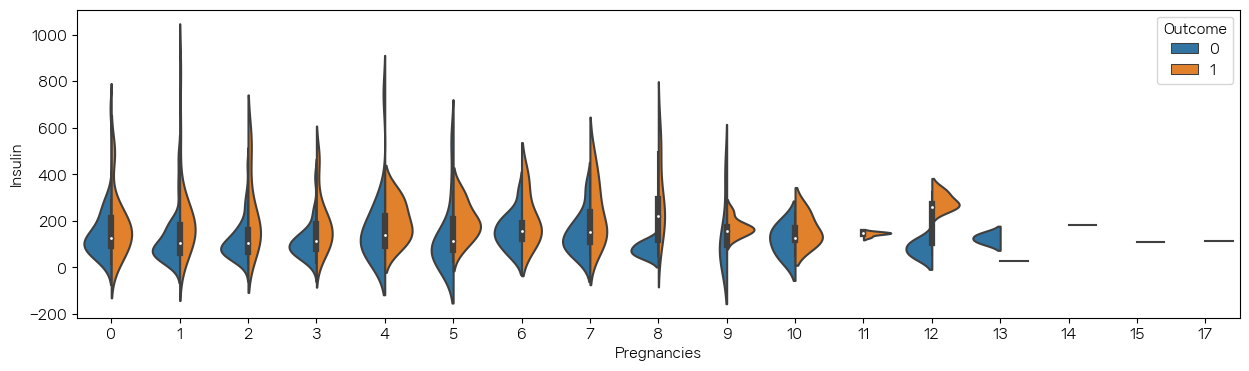

In [31]:
# 바이올린이 얇아 굵게 그리고, 두 파트 좌우로 데이터를 나누어준다(split) -> boxplot의 단점 보완
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome"
              , split=True);

# split=True: 그래프 반으로 쪼개서 표현하기, violinplot에서만 사용 가능!
# 바이올린 플롯은 데이터 분포를 확인할 수 있다

# swarmplot

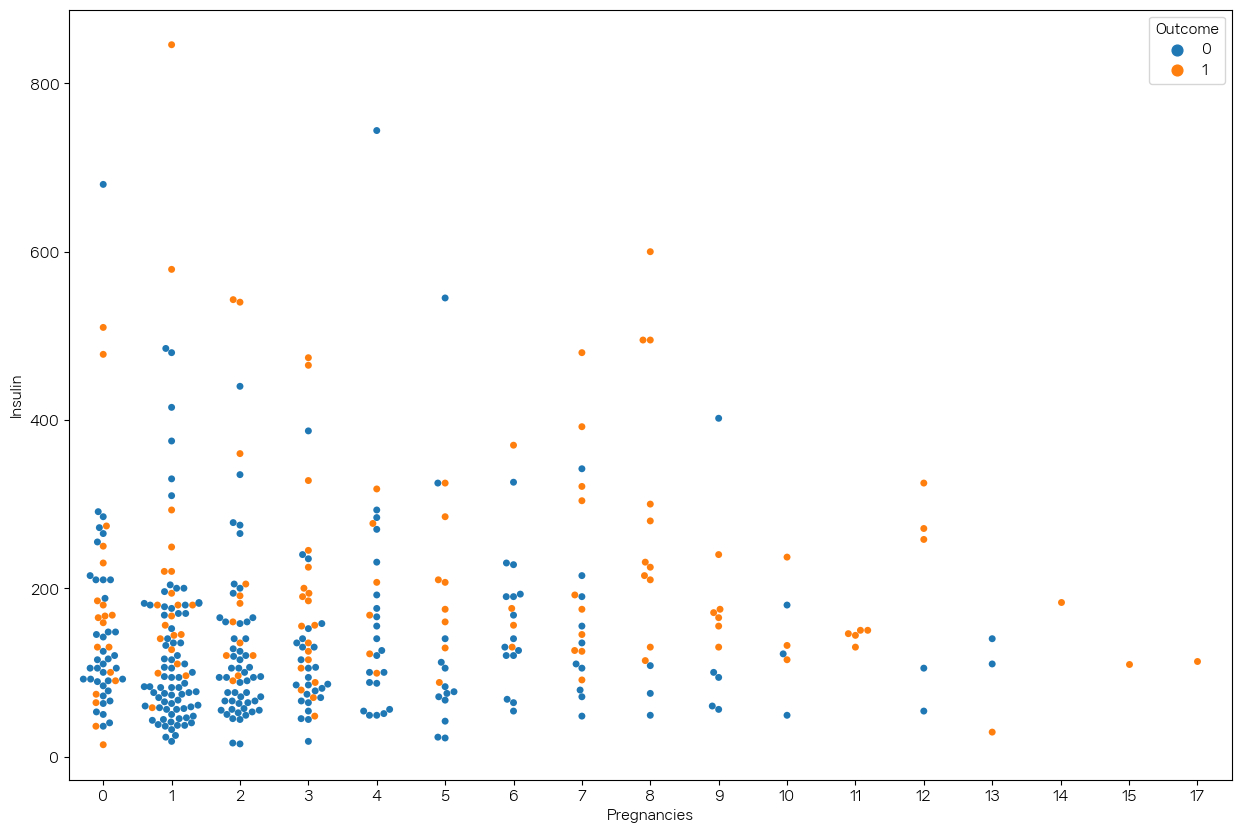

In [32]:
# swarmplot은 산포도 그리는 데에 적합. 데이터 수 확인 가능(violinplot과 함께)
plt.figure(figsize=(15,10))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome");

# 임신 횟수가 늘어날수록 데이터 수가 줄어듦 -> 임신 횟수와 당뇨병 발병률 사이에 관련이 있는 것으로 볼 수 있다.

# displot
- 한 개의 수치형 변수를 표현할 때 보통 사용한다
- countplot은 범주형(카테고리) 데이터를 시각화할 때 사용한다
- displot은 다른 그래프와 달리 data 옵션 없이 바로 Series 데이터를 넣어준다

In [33]:
# 발병하지 않는 데이터와 발병하는 데이터를 변수에 넣어준다
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

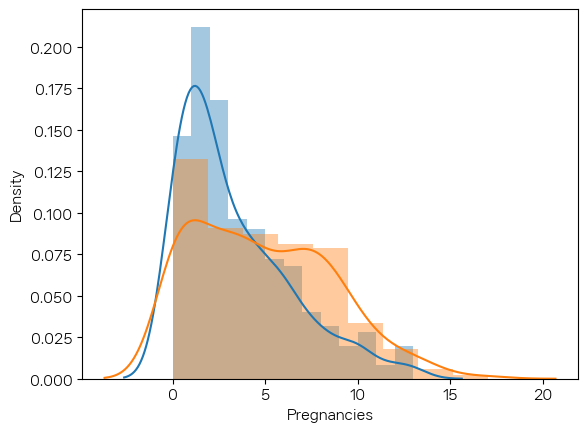

In [44]:
# 임신 횟수에 따른 당뇨병 발병 여부
# distplot은 data= 안 써도 된다(시리즈 데이터 넣어주기)
# dist -> dis로 변했나보다. 에러 메시지가 뜬다.
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

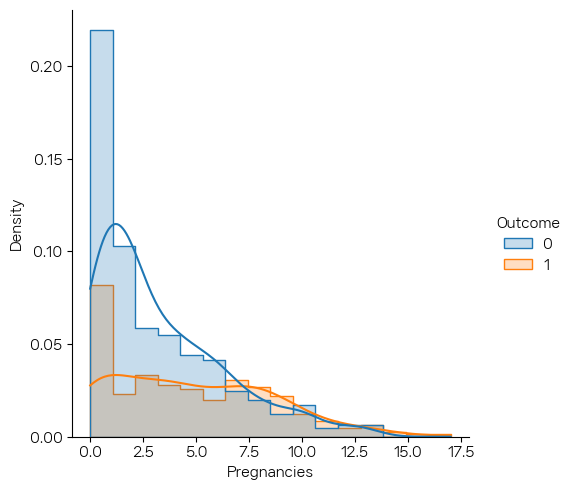

In [68]:
# 경고 메시지 때문에 변경
sns.displot(data=df, x="Pregnancies", hue="Outcome", kde=True, stat="density", element="step")

C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-pack

<AxesSubplot:xlabel='Age', ylabel='Density'>

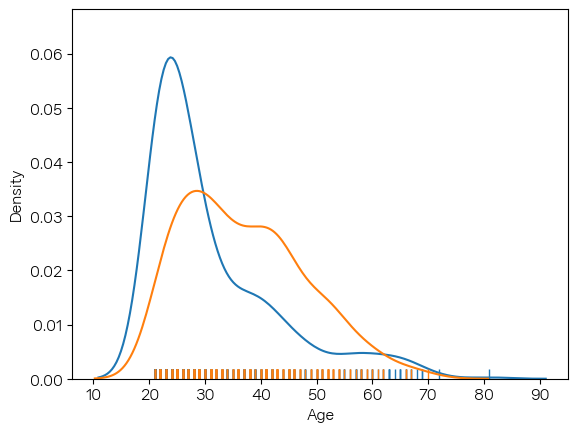

In [35]:
# 나이에 따른 당뇨병 발병 여부
# hist=False: 막대그래프 없애기
# rug=True: 바닥에 카펫같이 rug 깔기
# label=0: 데이터 구분해서 레전드값 넣어주기 -> 예전 버전이라 그런지 적용이 안 된다.
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

# Subplots
- distplot은 밀도함수와 커널추정함수를 같이 그려준다
- subplot은 범주형 column을 시각화할 때 사용하는 편
- histplot을 그릴 때는 수치형 데이터만 있어야 한다 -> 그래서 boolean값을 int형으로 바꿔줄 필요가 있다

## pandas를 통해 histplot 그리기

In [36]:
# Pregnancies_high 값은 불형식이라서 나오지 않는다. 따라서 형식 바꿔서 hist에 적용되도록 해주기
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0


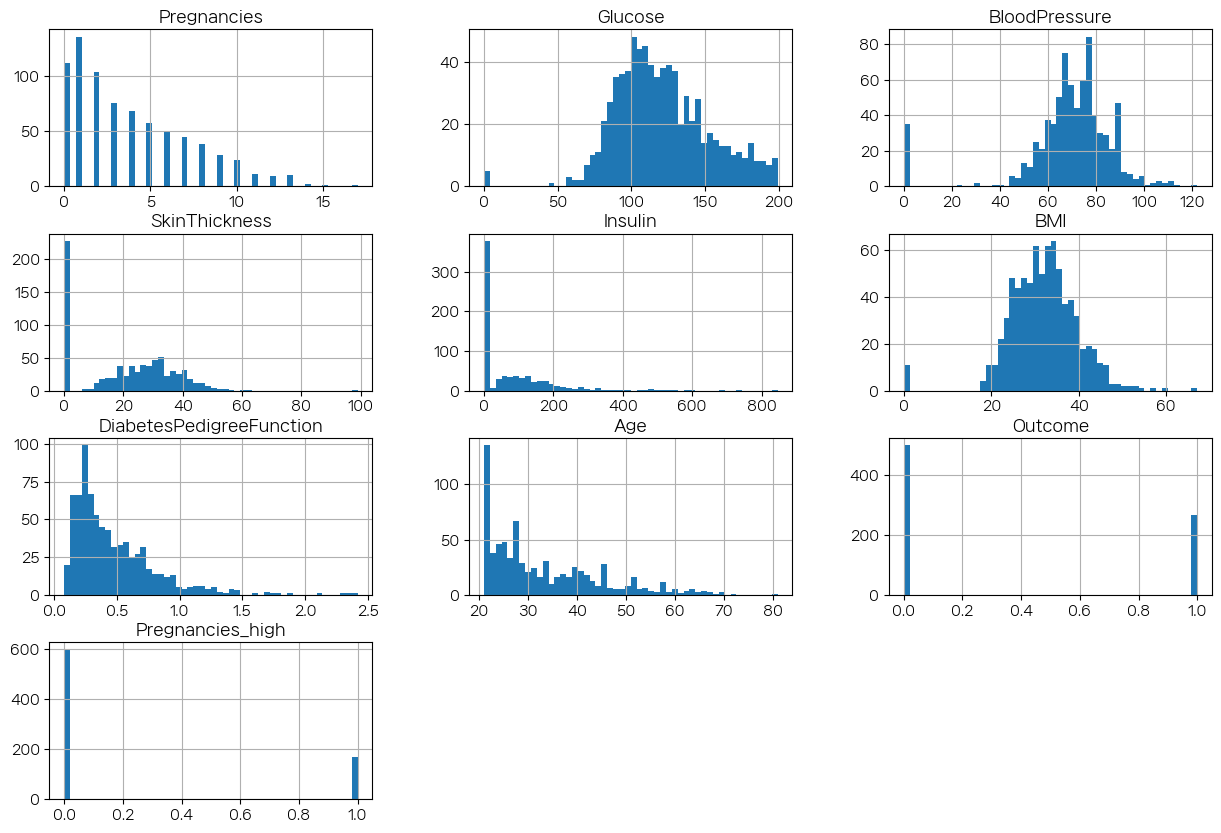

In [37]:
# pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려준다
df.hist(bins=50, figsize=(15,10));

## 반복문을 통해 서브 플롯 그리기

In [38]:
# distplot
# 컬럼의 수만큼 for문을 만들어서 서브플롯으로 시각화
col_num = df.columns.shape
col_num

(10,)

In [39]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1
5 BMI 1 2


C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

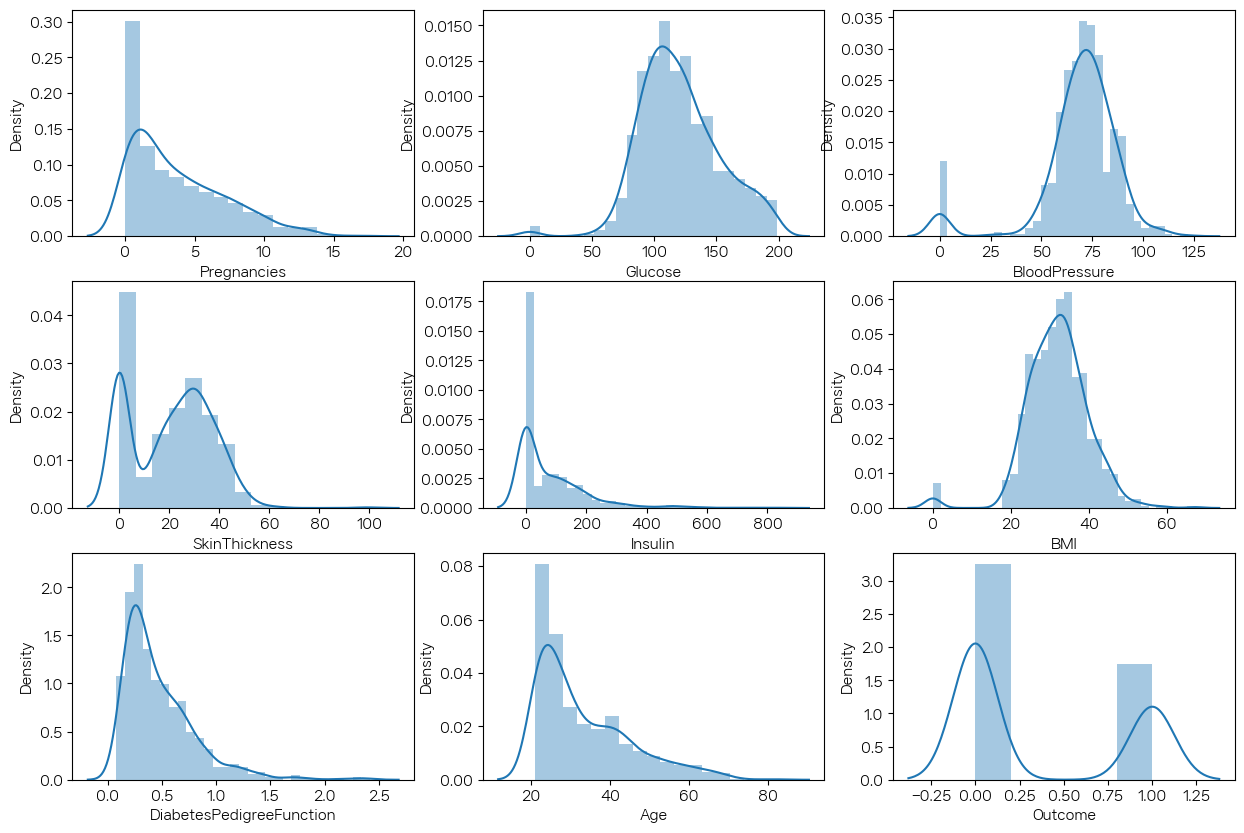

In [80]:
# distplot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10)); # 비어 있는 그래프

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col]);


In [41]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 1 0
3 SkinThickness 1 1


C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

4 Insulin 2 0
5 BMI 2 1
6 DiabetesPedigreeFunction 3 0
7 Age 3 1


C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wldus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

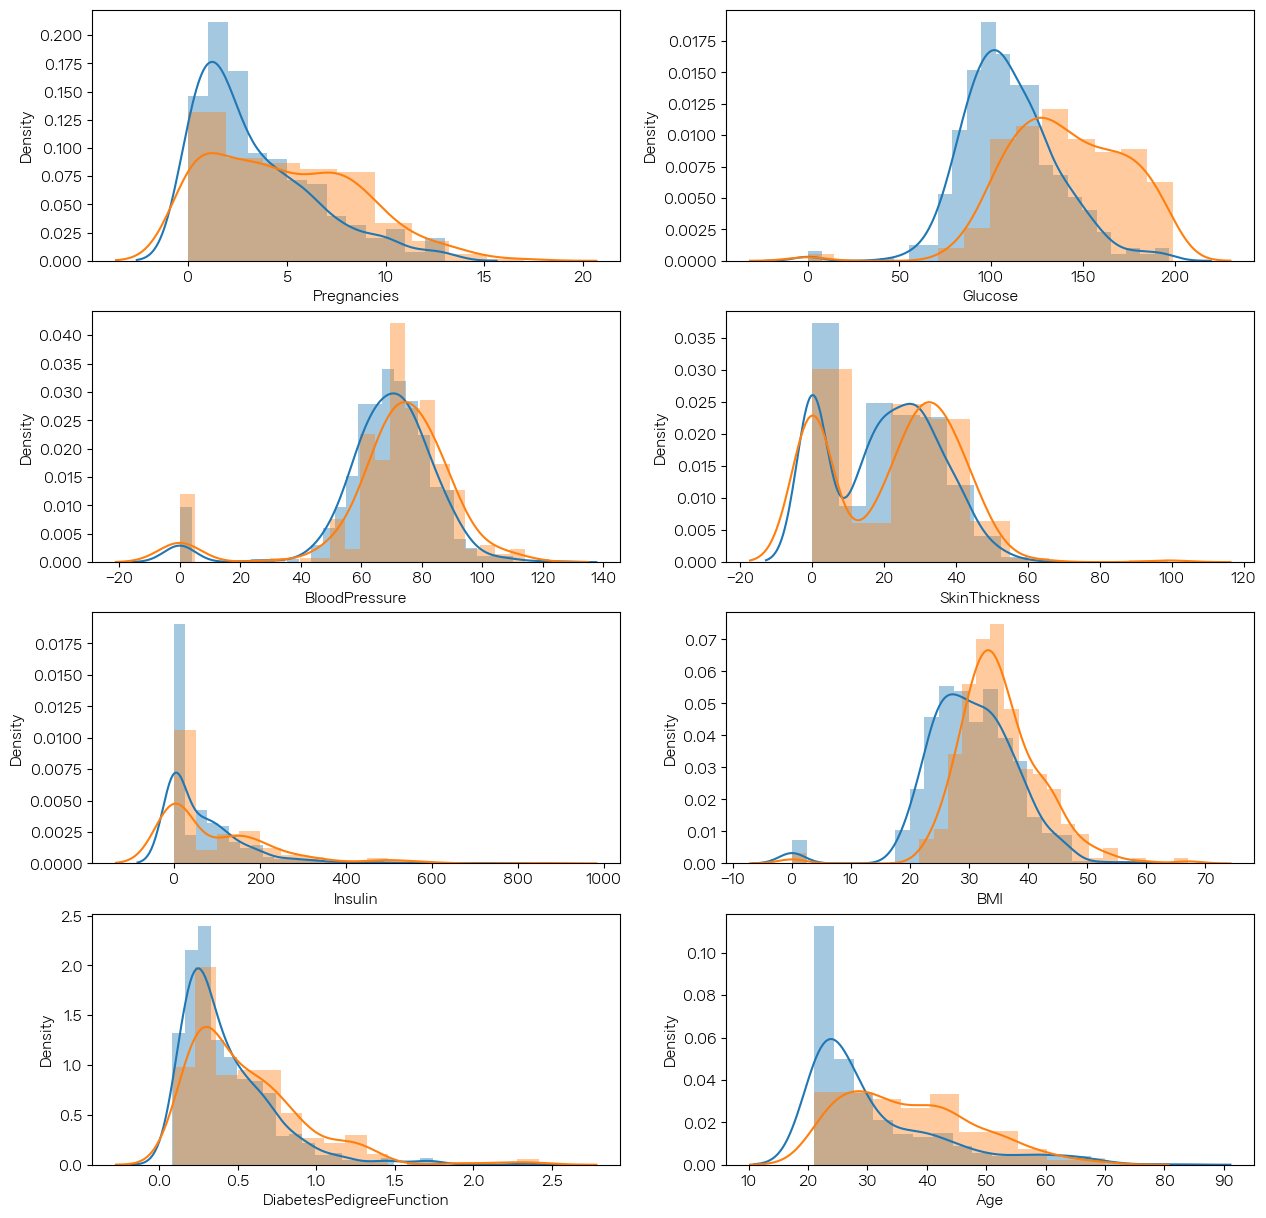

In [81]:
# 연속된 수치 변수를 범주형 변수로 만들어서 표현해볼 수 있다.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15)); # 비어 있는 그래프

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    print(i, col_name, row, col)
    sns.distplot(df_0[col_name], ax=axes[row][col]);
    sns.distplot(df_1[col_name], ax=axes[row][col]);

## violinplot

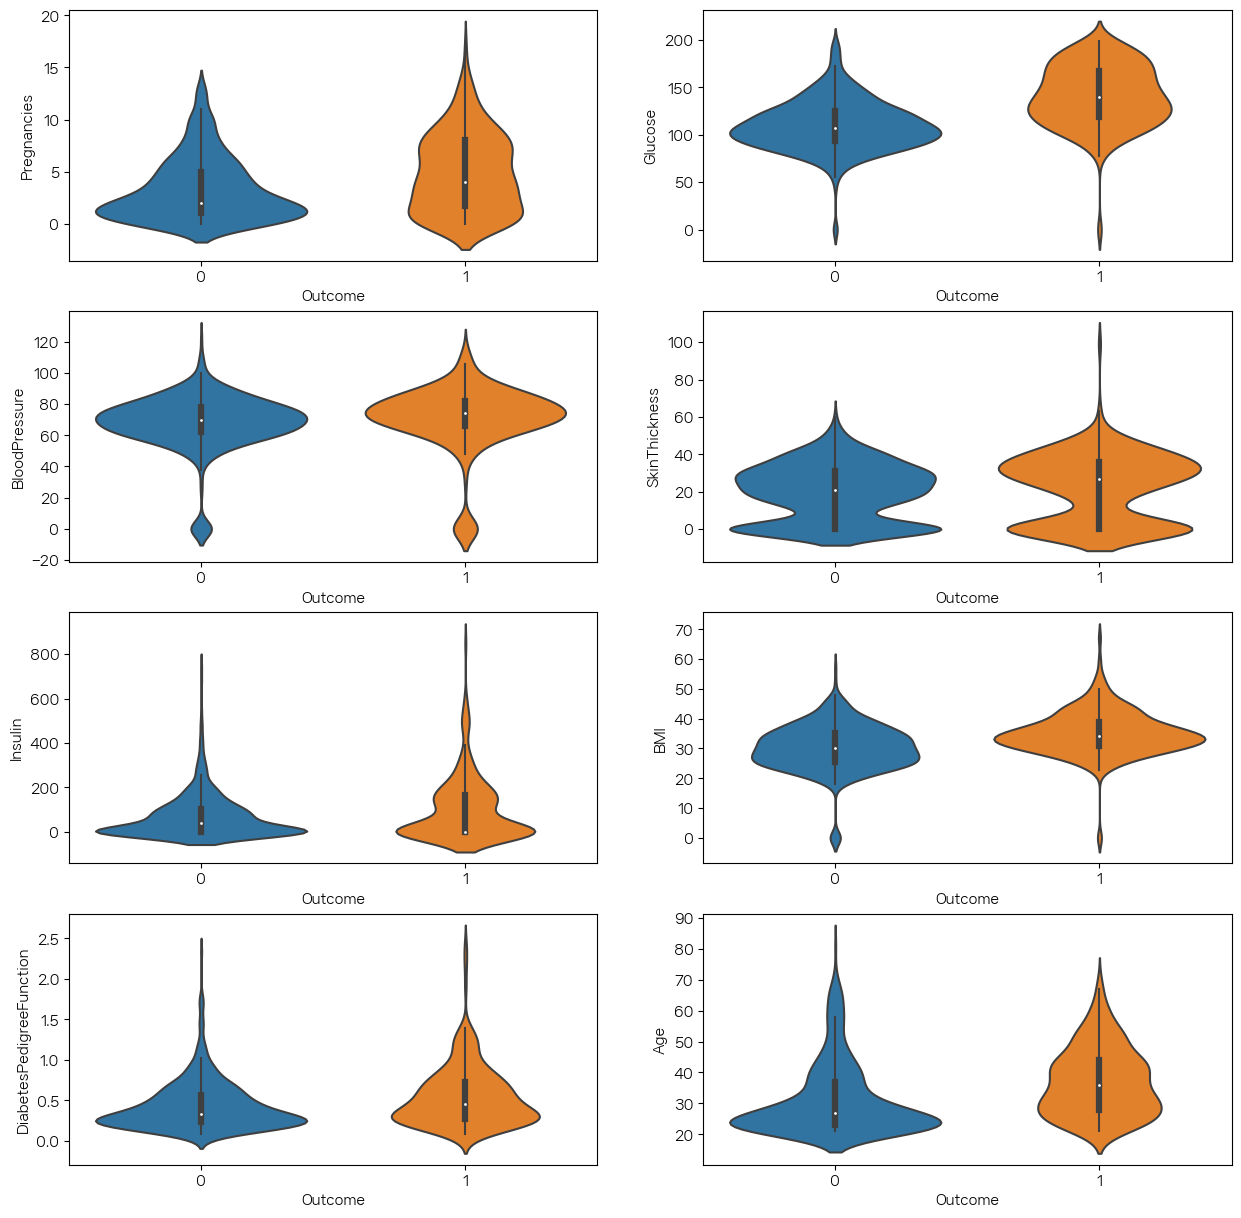

In [83]:
# violinplot에서 0에 몰려 있는 데이터는 결측치다.
# 포도당 수치와 인슐린 수치는 당뇨병과 관련이 있을 것이란 가설을 제시해보자

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15)); # 비어 있는 그래프

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col]);

## lmplot

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

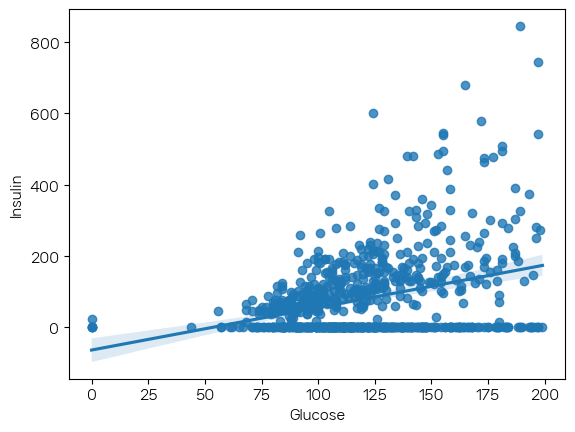

In [84]:
# 상관 계수가 높은 두 변수에 대해 시각화
sns.regplot(data=df, x="Glucose", y="Insulin");

# 인슐린 값에 0이 많아서 회귀선도 0이랑 가까워진 것 같다

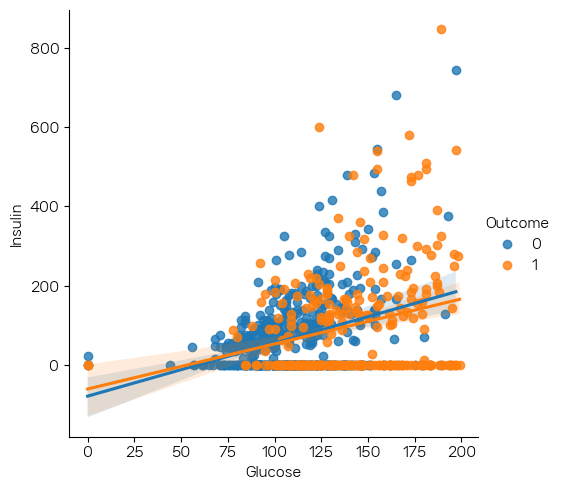

In [85]:
# regplot에는 hue 기능이 없으므로 lmplot 사용하여 hue에 따라 색상에 따라 다르게  나누기
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome");

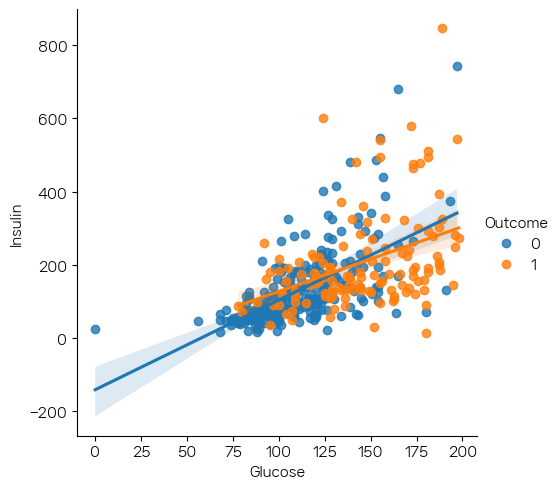

In [86]:
# 0 제거하고 그래프 그리기
sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome");

## pairplot

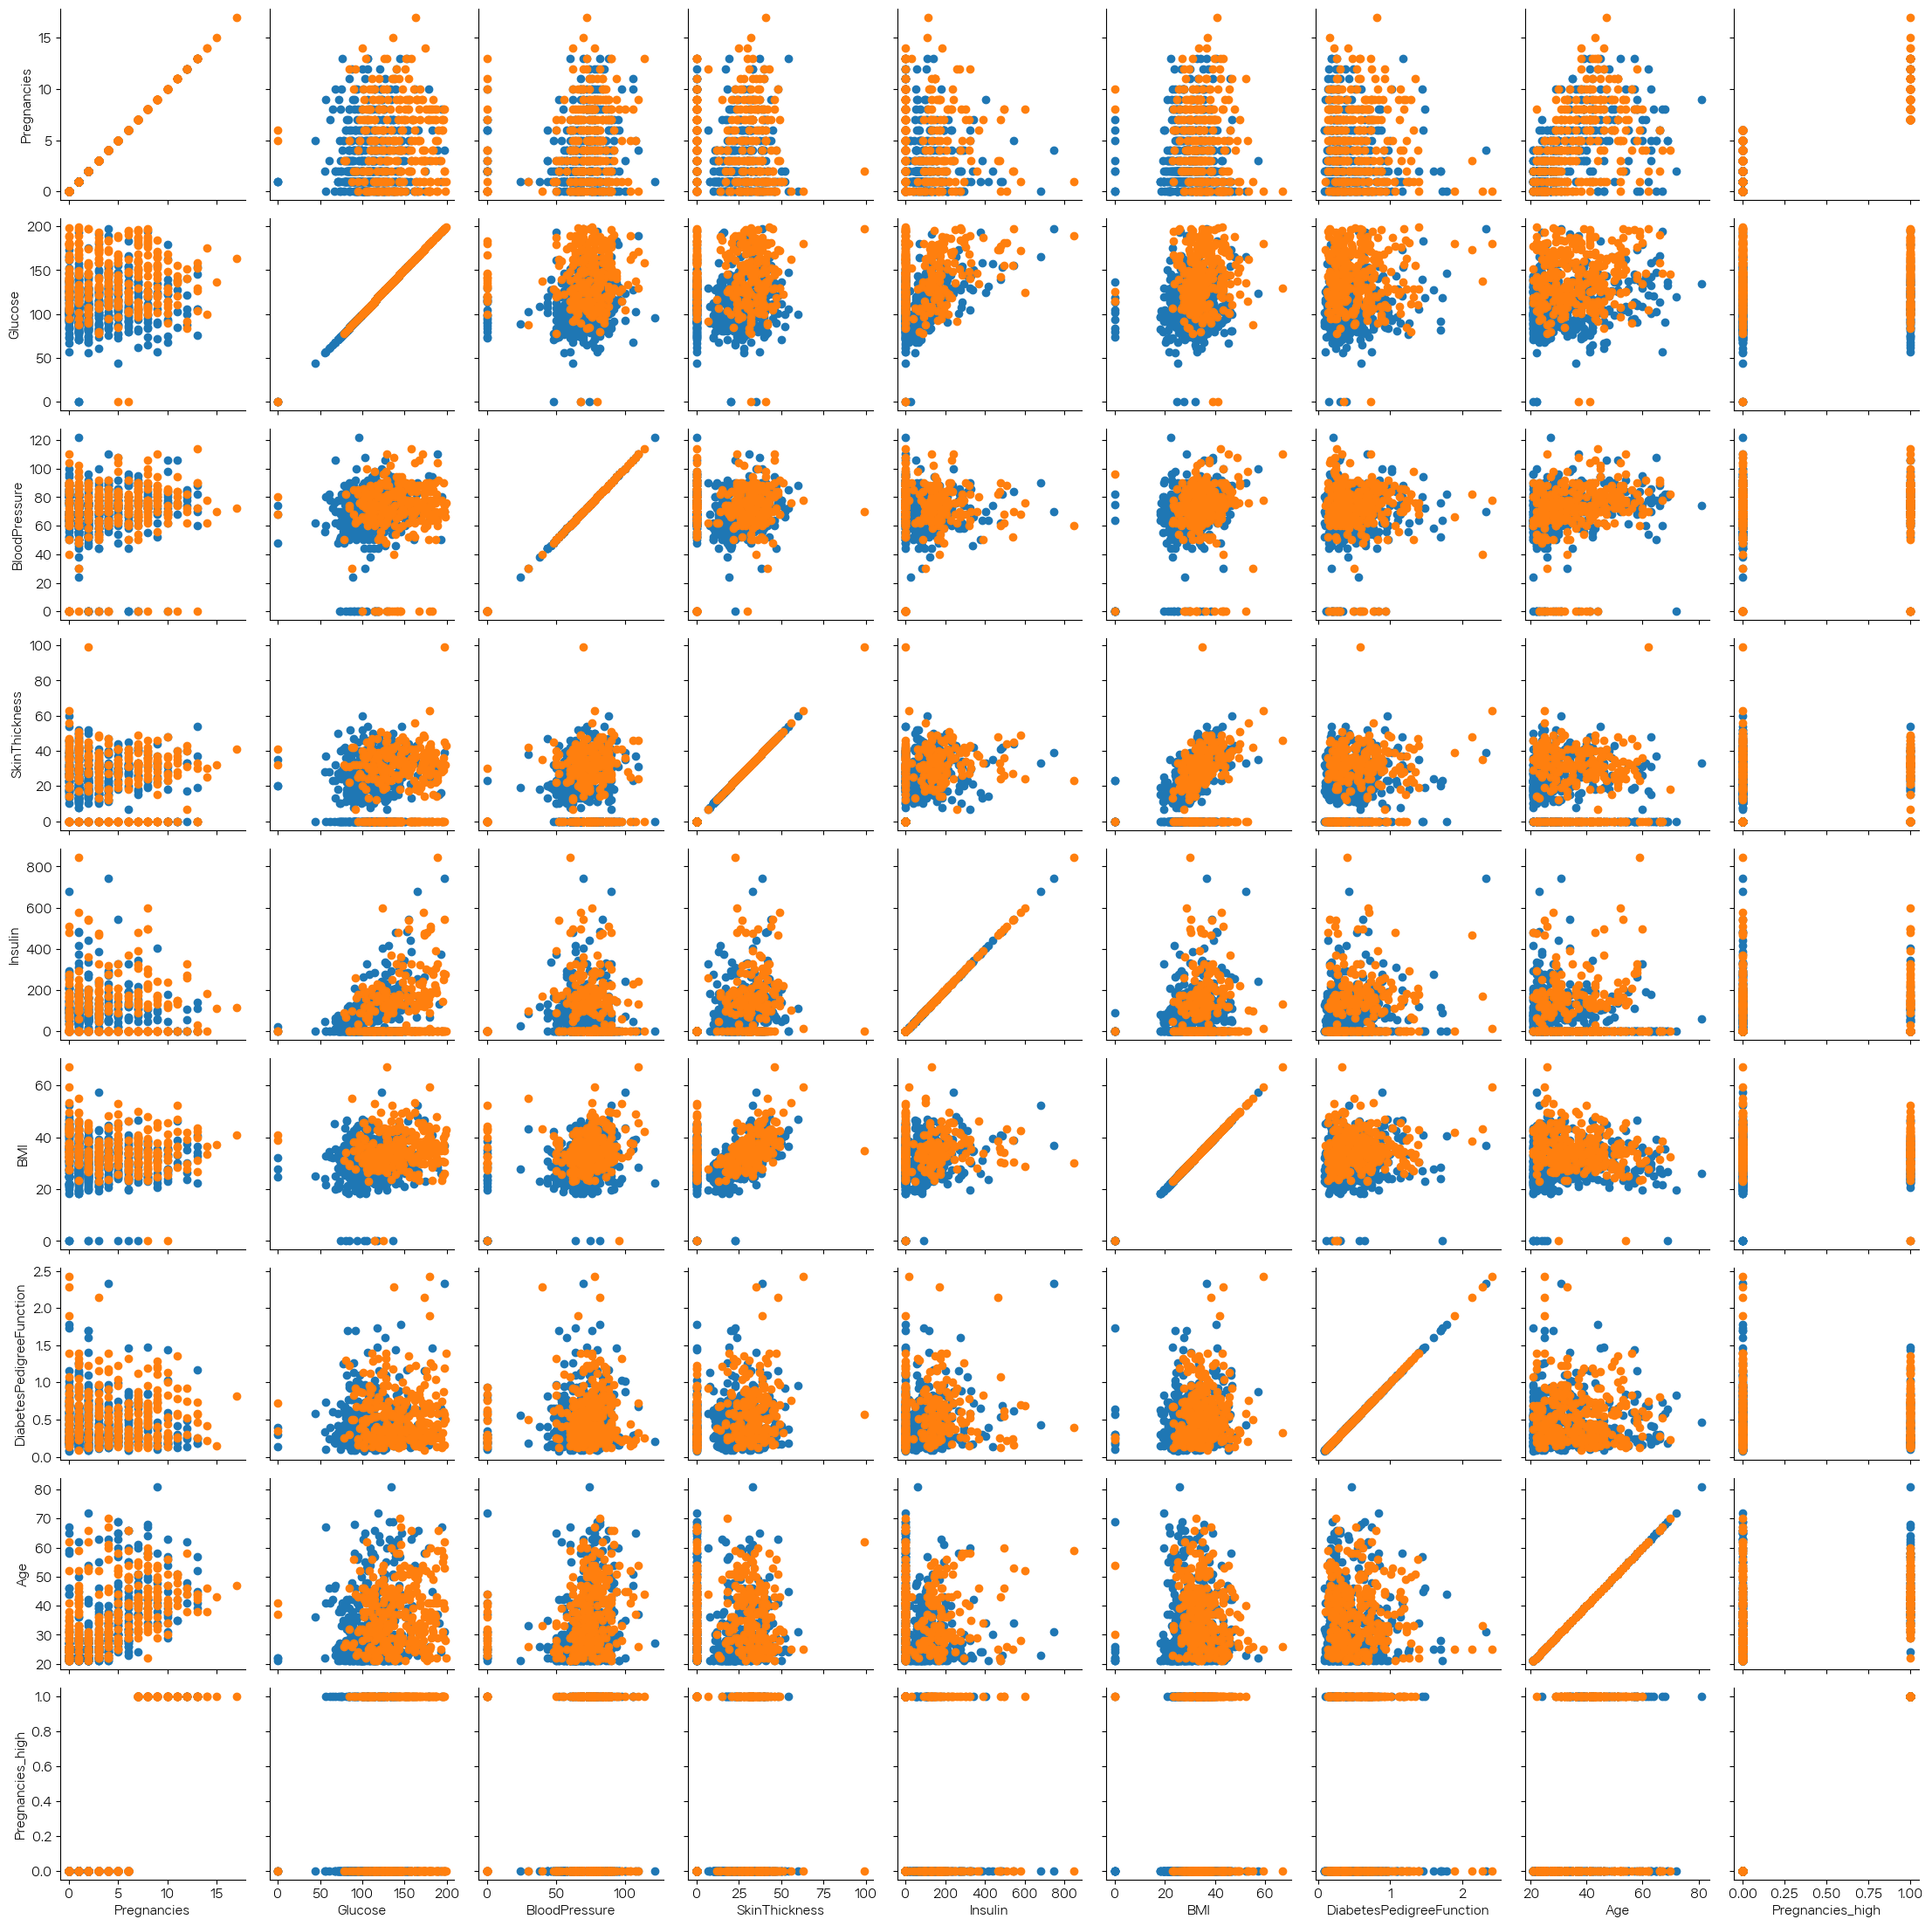

In [88]:
# 모든 변수에 대해 Outcome에 따른 scatterplot 그리기 -> 시간이 오래 걸림

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter);

# 한 가지 색으로
# sns.pairplot(df)

# 상관 분석
- 당뇨병 여부가 다른 변수와 어느 정도 상관 관계가 있는지
- ※ 주의 !
- 두 변수 간의 연관된 정도를 나타낼 뿐, 인과 관계를 설명하는 것은 아니다. 
- 두 변수 간 원인과 결과의 인과 관계가 있는지에 대한 것은 회귀 분석을 통해 인과 관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다
- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계,

In [91]:
# 결측치 제거하지 않고 상관 관계 확인해보기
# 판다스의 style.background_gradient를 이용하여, 현재 확인할 값이 많으니 편하게 볼 수 있게 시각화하기

df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


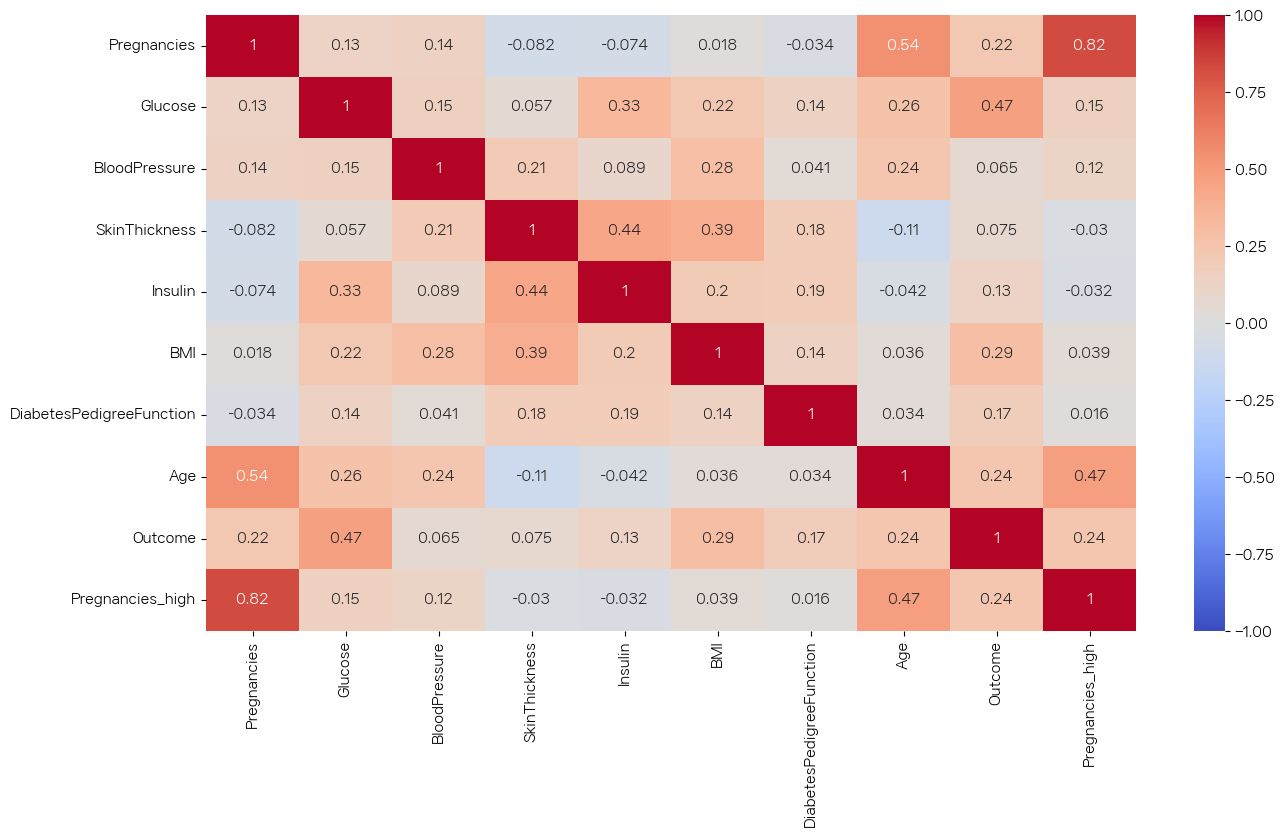

In [97]:
# heatmap 시각화
# vmax/vmin: 범위 수정
# annot: 숫자 표현
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="coolwarm", annot=True);

In [101]:
# 정답값인 outcome은 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만들어 준다
#  Pregnancies_high도 내가 만들어준 컬럼이기 때문에 제외
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix ["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [102]:
# 결측치 처리하고 보기

df_corr_matrix = df_matrix.corr()
df_corr_matrix.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


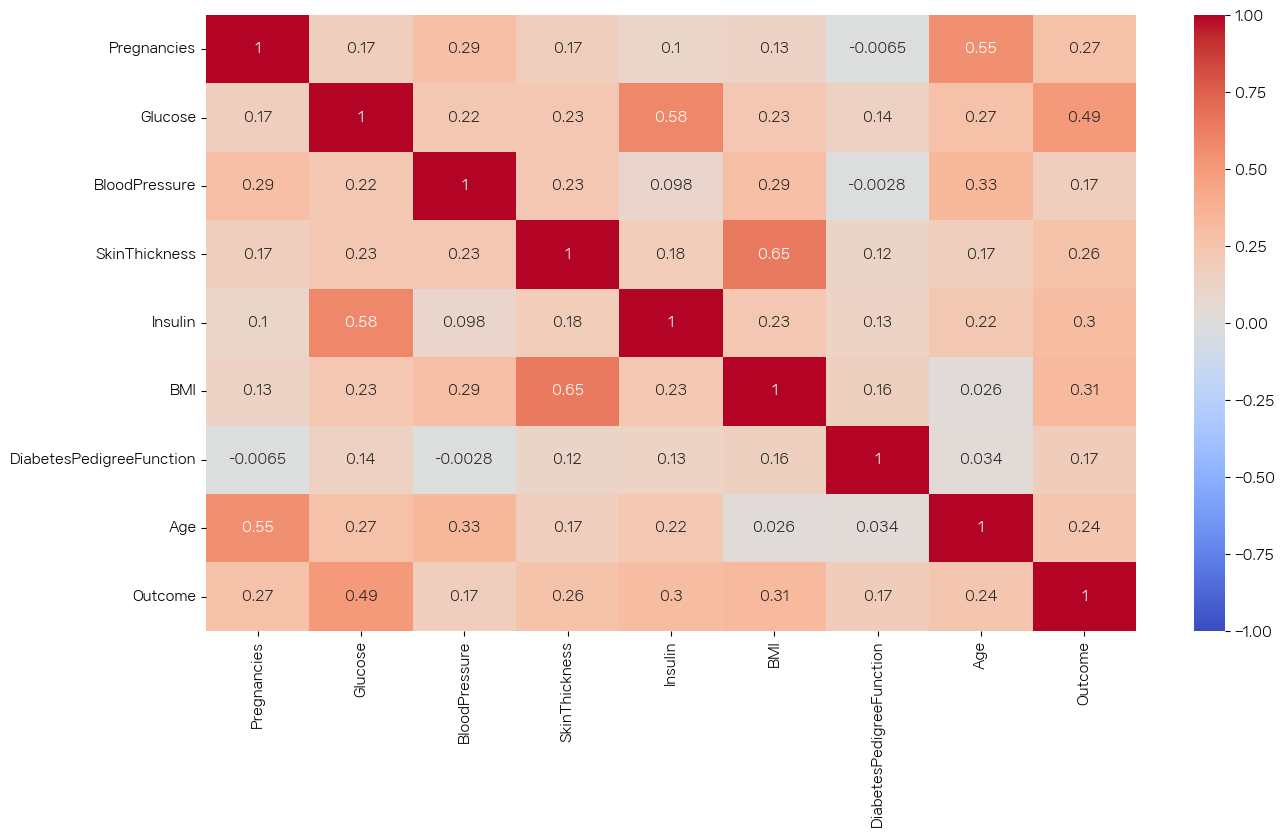

In [105]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr_matrix, vmax=1, vmin=-1, cmap="coolwarm", annot=True);

In [108]:
# Outcome 수치에 대한 상관 계수만 모아서 본다
df_corr_matrix["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## 상관계수가 높은 변수끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

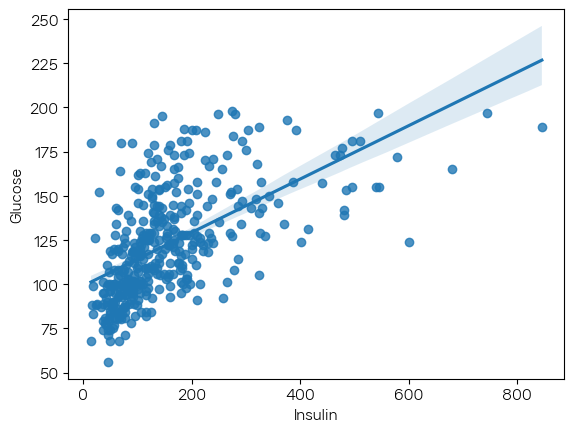

In [109]:
# Insulin과 Glucose
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

# 회귀선이 1에 가까울수록 상관 관계가 높다
# 이상치도 좀 보인다

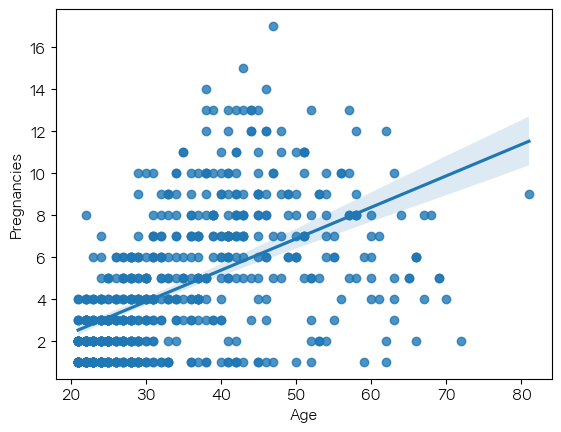

In [111]:
# Age와 Pregnancies 
sns.regplot(data=df_matrix, x="Age", y="Pregnancies");

# 연령이 증가함에 따라 임신 횟수도 증가함을 볼 수 있다
# 이상치도 보임

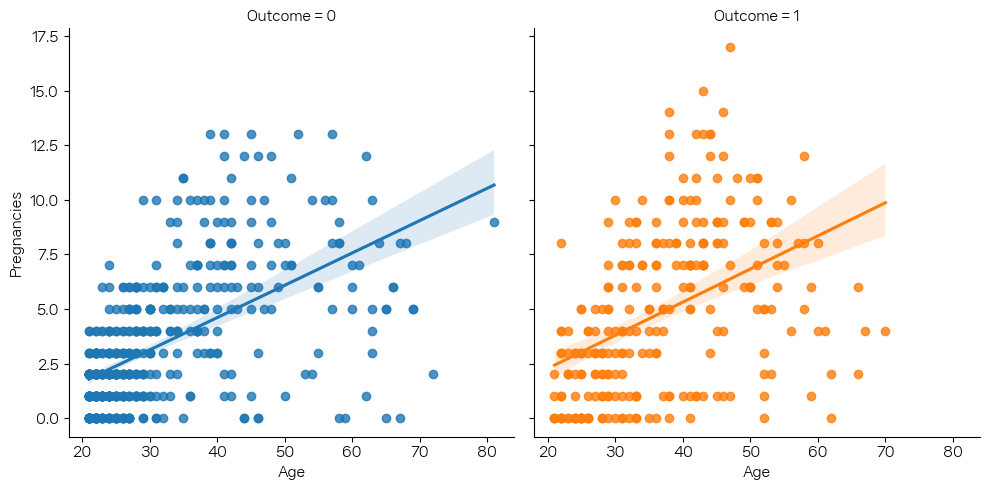

In [115]:
# lmplot의 hue 사용하여 다른 색상 추가
# col="Outcome" -> 따로 그리기
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome");